In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Dropout
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1

In [4]:
pd.set_option('display.expand_frame_repr', False)

In [5]:
Total_X_data = pd.read_csv("X_data.csv")
Total_Y_data = pd.read_csv("Y_data_voltage.csv")

Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
Total_X_data.shape

(5344, 76)

In [7]:
Total_X_data = Total_X_data.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [8]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [9]:
X_data = Total_X_data[1068:]
Y_data = Total_Y_data[1068:]

In [10]:
X_data.shape

(4276, 49)

In [11]:
Y_data.shape

(4276, 250)

## Scaling and splitting the X_data and Y_data

In [12]:
scaler_x = StandardScaler().fit(X_data)
scaler_y = StandardScaler().fit(Y_data)

X_data = scaler_x.transform(X_data)
Y_data = scaler_y.transform(Y_data)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

## TRAINING THE MODEL

In [14]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:

model1 = models.Sequential()
model1.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=[r_square])


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 232)               11600     
_________________________________________________________________
batch_normalization (BatchNo (None, 232)               928       
_________________________________________________________________
dropout (Dropout)            (None, 232)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 232)               928       
_________________________________________________________________
dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 232)               5

In [17]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [18]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0001)



In [19]:
callbacks = [callback,reduce_lr]

In [20]:
%%time
history1 = model1.fit(X_train, y_train,
                  epochs=1000,
                  batch_size=128,
                 validation_data=(X_val, y_val),shuffle=True, callbacks=[callbacks])

Epoch 1/1000
27/27 [==============================] - 0s 16ms/step - loss: 1.5938 - r_square: -0.6166 - val_loss: 0.7790 - val_r_square: 0.2486
Epoch 2/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.8023 - r_square: 0.1806 - val_loss: 0.5580 - val_r_square: 0.4592
Epoch 3/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.5327 - r_square: 0.4569 - val_loss: 0.3705 - val_r_square: 0.6401
Epoch 4/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.4168 - r_square: 0.5745 - val_loss: 0.2833 - val_r_square: 0.7243
Epoch 5/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.3556 - r_square: 0.6365 - val_loss: 0.2380 - val_r_square: 0.7682
Epoch 6/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.3083 - r_square: 0.6859 - val_loss: 0.2257 - val_r_square: 0.7805
Epoch 7/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.2792 - r_square: 0.7124 - val_loss: 0.2033 - val_r_square: 0.8020
Epo

27/27 [==============================] - 0s 6ms/step - loss: 0.0875 - r_square: 0.9109 - val_loss: 0.1434 - val_r_square: 0.8600
Epoch 59/1000
27/27 [==============================] - 0s 6ms/step - loss: 0.0973 - r_square: 0.9006 - val_loss: 0.1433 - val_r_square: 0.8602
Epoch 60/1000
27/27 [==============================] - 0s 6ms/step - loss: 0.0964 - r_square: 0.9013 - val_loss: 0.1431 - val_r_square: 0.8604
Epoch 61/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0913 - r_square: 0.9064 - val_loss: 0.1431 - val_r_square: 0.8603
Epoch 62/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0876 - r_square: 0.9107 - val_loss: 0.1427 - val_r_square: 0.8608
Epoch 63/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0908 - r_square: 0.9077 - val_loss: 0.1430 - val_r_square: 0.8603
Epoch 64/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0959 - r_square: 0.9012 - val_loss: 0.1424 - val_r_square: 0.8610
Epoch 65/1000

27/27 [==============================] - 0s 7ms/step - loss: 0.0855 - r_square: 0.9127 - val_loss: 0.1384 - val_r_square: 0.8649
Epoch 116/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0835 - r_square: 0.9150 - val_loss: 0.1384 - val_r_square: 0.8650
Epoch 117/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0826 - r_square: 0.9153 - val_loss: 0.1392 - val_r_square: 0.8642
Epoch 118/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0802 - r_square: 0.9182 - val_loss: 0.1386 - val_r_square: 0.8648
Epoch 119/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0870 - r_square: 0.9112 - val_loss: 0.1375 - val_r_square: 0.8659
Epoch 120/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0868 - r_square: 0.9112 - val_loss: 0.1375 - val_r_square: 0.8658
Epoch 121/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0819 - r_square: 0.9166 - val_loss: 0.1381 - val_r_square: 0.8653
Epoch 

Epoch 172/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0751 - r_square: 0.9234 - val_loss: 0.1346 - val_r_square: 0.8689
Epoch 173/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0794 - r_square: 0.9181 - val_loss: 0.1339 - val_r_square: 0.8693
Epoch 174/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0767 - r_square: 0.9217 - val_loss: 0.1346 - val_r_square: 0.8686
Epoch 175/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0780 - r_square: 0.9201 - val_loss: 0.1344 - val_r_square: 0.8689
Epoch 176/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0750 - r_square: 0.9237 - val_loss: 0.1346 - val_r_square: 0.8685
Epoch 177/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0740 - r_square: 0.9247 - val_loss: 0.1350 - val_r_square: 0.8681
Epoch 178/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0806 - r_square: 0.9175 - val_loss: 0.1358 - val_r_square:

Epoch 229/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0763 - r_square: 0.9220 - val_loss: 0.1324 - val_r_square: 0.8704
Epoch 230/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0712 - r_square: 0.9274 - val_loss: 0.1324 - val_r_square: 0.8706
Epoch 231/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0711 - r_square: 0.9276 - val_loss: 0.1329 - val_r_square: 0.8700
Epoch 232/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0779 - r_square: 0.9198 - val_loss: 0.1327 - val_r_square: 0.8701
Epoch 233/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0773 - r_square: 0.9200 - val_loss: 0.1326 - val_r_square: 0.8704
Epoch 234/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0722 - r_square: 0.9260 - val_loss: 0.1327 - val_r_square: 0.8702
Epoch 235/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0730 - r_square: 0.9255 - val_loss: 0.1317 - val_r_square:

Epoch 286/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0688 - r_square: 0.9300 - val_loss: 0.1312 - val_r_square: 0.8718
Epoch 287/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0666 - r_square: 0.9323 - val_loss: 0.1300 - val_r_square: 0.8728
Epoch 288/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0650 - r_square: 0.9339 - val_loss: 0.1304 - val_r_square: 0.8725
Epoch 289/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0671 - r_square: 0.9315 - val_loss: 0.1315 - val_r_square: 0.8714
Epoch 290/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0689 - r_square: 0.9290 - val_loss: 0.1312 - val_r_square: 0.8717
Epoch 291/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0733 - r_square: 0.9235 - val_loss: 0.1305 - val_r_square: 0.8723
Epoch 292/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0704 - r_square: 0.9276 - val_loss: 0.1298 - val_r_square:

Epoch 343/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0643 - r_square: 0.9344 - val_loss: 0.1290 - val_r_square: 0.8738
Epoch 344/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0658 - r_square: 0.9329 - val_loss: 0.1289 - val_r_square: 0.8739
Epoch 345/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0664 - r_square: 0.9326 - val_loss: 0.1289 - val_r_square: 0.8739
Epoch 346/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0638 - r_square: 0.9351 - val_loss: 0.1300 - val_r_square: 0.8729
Epoch 347/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0700 - r_square: 0.9288 - val_loss: 0.1294 - val_r_square: 0.8734
Epoch 348/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0660 - r_square: 0.9327 - val_loss: 0.1292 - val_r_square: 0.8736
Epoch 349/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0725 - r_square: 0.9256 - val_loss: 0.1288 - val_r_square:

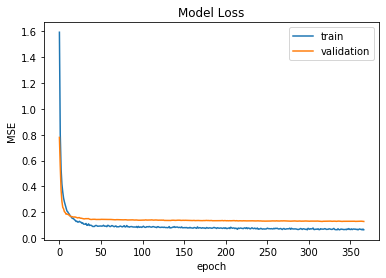

In [21]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

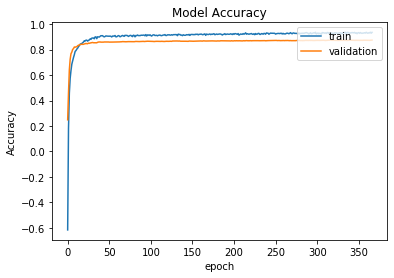

In [22]:
plt.plot(history1.history['r_square'])
plt.plot(history1.history['val_r_square'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Text(0.5, 0, 'Epochs')

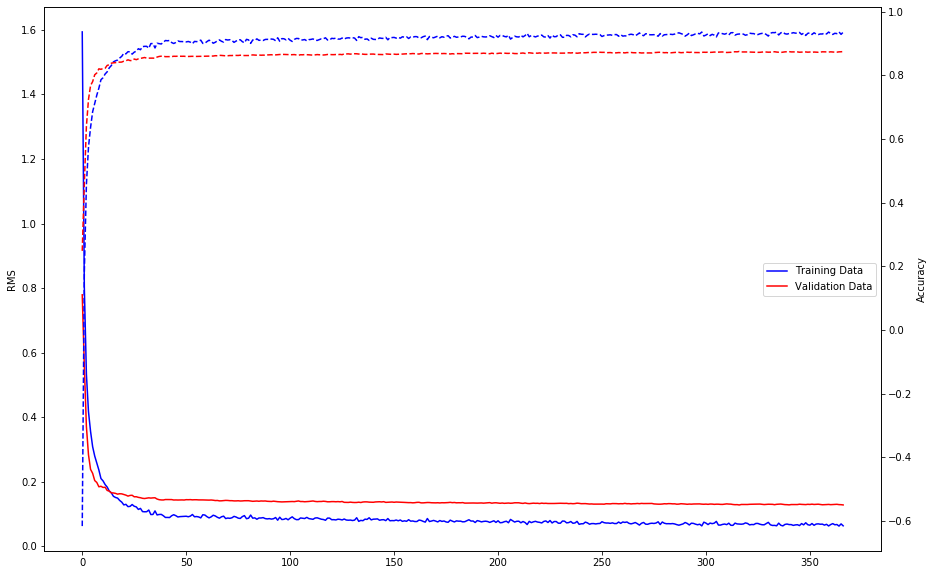

In [23]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


## TRAINING THE WHOLE MODEL AND PREDICTION

In [24]:
##X_data and Y_data are already scaled

X_train_all = X_data
Y_train_all = Y_data


In [25]:

model2 = models.Sequential()
model2.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=[r_square])

In [26]:
%%time
history2 = model2.fit(X_train_all, Y_train_all,
                  epochs=154,
                  batch_size=128,
                  )

Epoch 1/154
34/34 [==============================] - 0s 6ms/step - loss: 1.4340 - r_square: -0.4427
Epoch 2/154
34/34 [==============================] - 0s 8ms/step - loss: 0.6539 - r_square: 0.3461
Epoch 3/154
34/34 [==============================] - 0s 7ms/step - loss: 0.4437 - r_square: 0.5521
Epoch 4/154
34/34 [==============================] - 0s 6ms/step - loss: 0.3687 - r_square: 0.6273
Epoch 5/154
34/34 [==============================] - 0s 7ms/step - loss: 0.3124 - r_square: 0.6832
Epoch 6/154
34/34 [==============================] - 0s 7ms/step - loss: 0.2843 - r_square: 0.7123
Epoch 7/154
34/34 [==============================] - 0s 8ms/step - loss: 0.2510 - r_square: 0.7472
Epoch 8/154
34/34 [==============================] - 0s 7ms/step - loss: 0.2292 - r_square: 0.7689
Epoch 9/154
34/34 [==============================] - 0s 7ms/step - loss: 0.2087 - r_square: 0.7897
Epoch 10/154
34/34 [==============================] - 0s 7ms/step - loss: 0.1982 - r_square: 0.8006
Epoch 11

Epoch 83/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0765 - r_square: 0.9227
Epoch 84/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0745 - r_square: 0.9249
Epoch 85/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0732 - r_square: 0.9260
Epoch 86/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0741 - r_square: 0.9248
Epoch 87/154
34/34 [==============================] - 0s 8ms/step - loss: 0.0731 - r_square: 0.9264
Epoch 88/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0712 - r_square: 0.9281
Epoch 89/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0716 - r_square: 0.9275
Epoch 90/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0747 - r_square: 0.9246
Epoch 91/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0696 - r_square: 0.9301
Epoch 92/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0748 - r_square: 0.9238


In [27]:
## Prediction on Test data

In [28]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [29]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [30]:
ypred2 = model2.predict(Test_X_data)
print(r2_score(Test_Y_data,ypred2))

0.8351031760409681


## Feature Importance

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\Ashesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ashesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
def final_model():
    model = models.Sequential()
    model.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(232, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(232,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(232,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(y_train.shape[1]))
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=[r_square])
    return model


In [33]:
my_model = KerasRegressor(build_fn=final_model) 
my_model.fit(X_data, Y_data,
                  epochs=154,
                  batch_size=128,
                  )

Epoch 1/154
34/34 [==============================] - 0s 5ms/step - loss: 1.4949 - r_square: -0.4957
Epoch 2/154
34/34 [==============================] - 0s 5ms/step - loss: 0.6846 - r_square: 0.3133
Epoch 3/154
34/34 [==============================] - 0s 5ms/step - loss: 0.4571 - r_square: 0.5396
Epoch 4/154
34/34 [==============================] - 0s 5ms/step - loss: 0.3673 - r_square: 0.6306
Epoch 5/154
34/34 [==============================] - 0s 5ms/step - loss: 0.3098 - r_square: 0.6883
Epoch 6/154
34/34 [==============================] - 0s 5ms/step - loss: 0.2827 - r_square: 0.7107
Epoch 7/154
34/34 [==============================] - 0s 5ms/step - loss: 0.2575 - r_square: 0.7377
Epoch 8/154
34/34 [==============================] - 0s 5ms/step - loss: 0.2260 - r_square: 0.7721
Epoch 9/154
34/34 [==============================] - 0s 6ms/step - loss: 0.2180 - r_square: 0.7803
Epoch 10/154
34/34 [==============================] - 0s 6ms/step - loss: 0.2009 - r_square: 0.7960
Epoch 11

34/34 [==============================] - 0s 8ms/step - loss: 0.0773 - r_square: 0.9215
Epoch 84/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0755 - r_square: 0.9233
Epoch 85/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0778 - r_square: 0.9209
Epoch 86/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0766 - r_square: 0.9212
Epoch 87/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0856 - r_square: 0.9103
Epoch 88/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0757 - r_square: 0.9223
Epoch 89/154
34/34 [==============================] - 0s 7ms/step - loss: 0.0747 - r_square: 0.9238
Epoch 90/154
34/34 [==============================] - 0s 8ms/step - loss: 0.0836 - r_square: 0.9149
Epoch 91/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0705 - r_square: 0.9276
Epoch 92/154
34/34 [==============================] - 0s 6ms/step - loss: 0.0727 - r_square: 0.9259
Epoch 93/154


In [34]:
perm = PermutationImportance(my_model, random_state=101).fit(X_data,Y_data,epochs=154,
                  batch_size=128) 

134/134 [==============================] - 0s 1ms/step - loss: 0.0244 - r_square: 0.9746


134/134 [==============================] - 0s 846us/step - loss: 0.0422 - r_square: 0.9561


134/134 [==============================] - 0s 842us/step - loss: 0.0241 - r_square: 0.9749


In [35]:
eli5.explain_weights(perm, feature_names=Total_X_data.columns.to_list(),top=49)

Weight,Feature
0.3911 ± 0.0135,N
0.3818 ± 0.0202,V_myo(um3)
0.2771 ± 0.0156,g_D(um3_per_ms)
0.1938 ± 0.0133,K_L(mM)
0.1844 ± 0.0105,V_myo_uL(uL)
0.1719 ± 0.0136,del_VL(mV)
0.1182 ± 0.0059,tau_L(ms)
0.0859 ± 0.0089,phi_L
0.0731 ± 0.0024,g_t(microS)
0.0620 ± 0.0033,K_RyR(mM)


In [36]:
## Purano code bata try garne

In [37]:
import seaborn as sns
def PFI_plotter_same(PFI,names,ap_times,save=False,filename=None):

#   first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
#   second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
#   third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,10))
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  
  x_array = [f*0.025 for f in range(PFI.shape[2])]
  #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
  #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
  #plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)
  
  
  for i in range(PFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);


    plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    

    
    


    plt.legend()
  

In [38]:
def PFI_plotter(PFI,names,ap_times,save=False,filename='None'):

  plt.figure(figsize=(15,160))


  x_array = [f*0.025 for f in range(PFI.shape[2])]
  for i in range(PFI.shape[1]):
    

    plt.subplot(PFI.shape[1],1,i+1);

    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;


    plt.plot(x_array,mu,c='r',linewidth=1);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
 
    
    
    


    plt.legend(loc='right')

In [39]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X) # baseline predictions
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c]) #Baseline error
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1])) # Empty array for importances
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]): # Iterate over columns
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j]) # Permute one column

      perm_yhat = model.predict(X)
      


      # Permuted Error
      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])]) 
      PFI[i,j,:] = FI_perm - base_line # Feature importance
  
  return PFI

In [40]:
Test_X_data.shape

(1068, 49)

In [41]:
Test_Y_data.shape

(1068, 250)

In [42]:
%%time
seeds = [123*i for i in range(1,4)]
PFI = Permuted_feature_impotance(Test_X_data,Test_Y_data,model2,seeds)

Wall time: 14.7 s


In [43]:
PFI.shape

(3, 49, 250)

In [44]:
Total_X_data.columns

Index(['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'a_endo', 'b_endo', 'g_ss(microS)',
       'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)', 'g_B_Ca(microS)',
       'Ca_o(millimolar)', 'g_D(um3_per_ms)', 'J_R(um3_per_ms)',
       'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)', 'eta',
       'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'],
      dtype='object')

In [111]:
names = ['V_myo(um3)', 
         'V_myo_uL(uL)', 
         'V_SR_uL(uL)', 
         'i_NaK_max(uA)',
       'K_m_K(mM)',
         'K_m_Na(mM)',
         'K_o(millimolar)',
         'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)',
         'g_t(microS)', 
         'a_endo',
         'b_endo', 
         'g_ss(microS)',
       'g_K1(microS)', 
         'g_f(microS)',
         'g_B_Na(microS)', 
         'g_B_Ca(microS)',
       'Ca_o(millimolar)', 
         'g_D(um3_per_ms)', 
         'J_R(um3_per_ms)',
       'J_L(um3_per_ms)', 
         'N', 'K_mNa(mM)', 
         'K_mCa(mM)',
         'eta',
       'g_NCX(mM_per_ms)', 
         'g_SERCA(mM_per_ms)', 
         'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 
         'g_CaB(mM_per_mV_ms)', 
         'k_CMDN(mM)', 
         'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 
         'k_Ref_off(per_ms)', 
         'gamma_trpn',
       'Ca_50ref(mM)',
         'A_1', 
         'A_2', 
         'A_3', 
         'V_L(mV)', 
         'del_VL(mV)', 
         'phi_L',
       't_L(ms)', 
         'tau_L(ms)',
         'phi_R', 
         'theta_R',
         'K_RyR(mM)',
         'K_L(mM)',
       'tau_s_ss']

In [112]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def aggregated_features(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

In [113]:
ap_times,amp,w,wp = aggregated_features(scaler_y.inverse_transform(Test_Y_data))

Text(0, 0.5, 'Feature Importance')

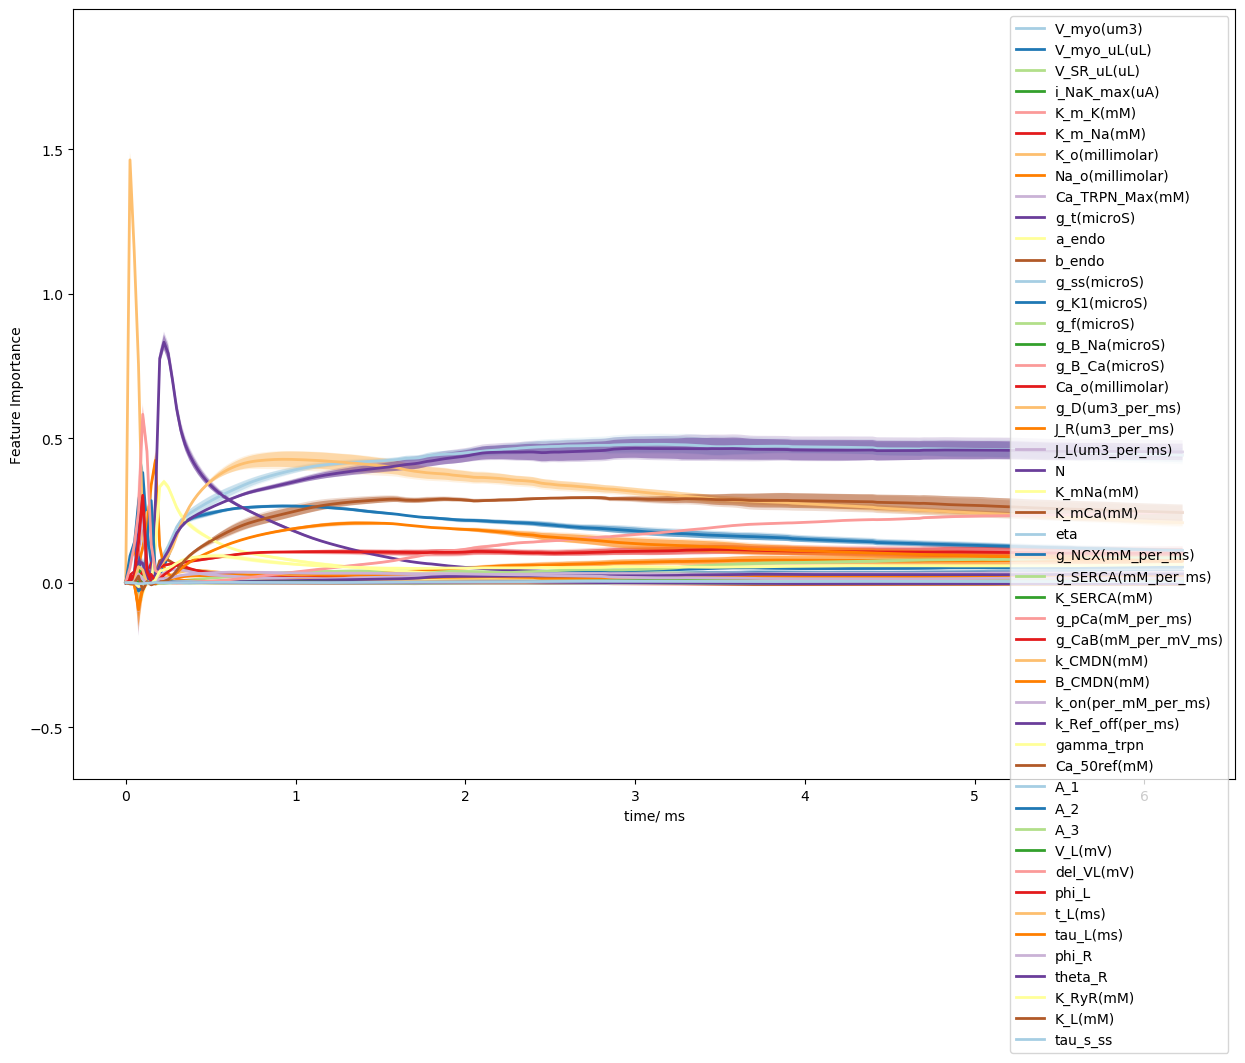

In [114]:
plt.style.use('default')
PFI_plotter_same(PFI,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')

In [115]:
perm_1 = pd.DataFrame(PFI[0].T).mean().to_numpy()
perm_2 = pd.DataFrame(PFI[1].T).mean().to_numpy()
perm_3 = pd.DataFrame(PFI[2].T).mean().to_numpy()

In [116]:
df = pd.DataFrame((perm_1 + perm_2 + perm_3)/3)

In [117]:
df

,0
0,0.421777
1,0.176162
2,0.030838
3,0.005350
4,-0.003317
5,0.014982
6,0.038481
7,0.061660
8,0.022334
9,0.076021


In [118]:
df.columns = ['Importance']

In [119]:
df[abs(df['Importance']) > 0.05]

,Importance
0,0.421777
1,0.176162
7,0.061660
9,0.076021
18,0.293652
21,0.409594
40,0.155432
41,0.101705
43,0.123654
46,0.056283


In [120]:
j=[0,1,7,9,18,21,40,41,43,46,47]

In [121]:
for i in range(49):
    if i in j:
        print(names[i])

V_myo(um3)
V_myo_uL(uL)
Na_o(millimolar)
g_t(microS)
g_D(um3_per_ms)
N
del_VL(mV)
phi_L
tau_L(ms)
K_RyR(mM)
K_L(mM)


In [135]:
names =[
'V_myo(um3)',
'V_myo_uL(uL)',
'Na_o(millimolar)',
'g_t(microS)',
'g_D(um3_per_ms)',
'N',
'del_VL(mV)',
'phi_L',
'tau_L(ms)',
'K_RyR(mM)',
'K_L(mM)',
]

In [136]:
len(names)

11

In [137]:
Total_X_data

,V_myo(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),g_t(microS),...,V_L(mV),del_VL(mV),phi_L,t_L(ms),tau_L(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),tau_s_ss
0,18087.633040,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,0.035996,...,-2.644113,6.127889,2.776715,1.202394,893.730844,0.069589,0.008294,0.029984,0.000162,2.363106
1,35119.155518,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,0.033241,...,-2.777012,8.826759,2.609261,0.828769,760.785799,0.073601,0.010835,0.037541,0.000160,2.312663
2,31723.880665,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,0.051464,...,-1.977765,6.814161,2.093193,1.398835,641.688994,0.074748,0.007420,0.058981,0.000150,2.113083
3,17885.692846,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,0.051356,...,-1.225460,10.145411,2.740481,0.851633,798.744010,0.068951,0.009030,0.042338,0.000288,2.977916
4,30331.086522,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,0.024628,...,-2.637613,3.606173,2.067057,1.037145,658.721930,0.054088,0.007173,0.056029,0.000117,2.053384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,29686.697458,0.000032,0.000003,0.000137,1.545477,12.402027,4.349500,168.432829,0.093633,0.024616,...,-2.281908,5.671512,1.507832,1.153906,606.260111,0.069653,0.008720,0.025202,0.000140,3.084144
5340,14571.354624,0.000020,0.000001,0.000096,1.321781,7.314302,5.223747,146.514228,0.091678,0.039962,...,-2.742914,7.430111,2.594849,0.974083,459.554055,0.070424,0.009969,0.055870,0.000264,1.108004
5341,32437.538891,0.000022,0.000003,0.000092,1.545330,8.810272,7.539690,207.497693,0.068950,0.041256,...,-1.908214,6.426500,2.217921,1.164595,381.188626,0.052886,0.009852,0.023352,0.000201,2.526280
5342,28460.428755,0.000015,0.000002,0.000115,1.331515,9.105736,7.301446,132.468385,0.087496,0.023163,...,-1.452764,4.512533,2.013150,0.587099,788.902703,0.057020,0.008370,0.027257,0.000214,1.410034


In [138]:
PFI_new = PFI[:, [0,1,7,9,18,21,40,41,43,46,47] , :]

In [139]:
len(names)

11

In [140]:
PFI_new.shape

(3, 11, 250)

Text(0, 0.5, 'Feature Importance')

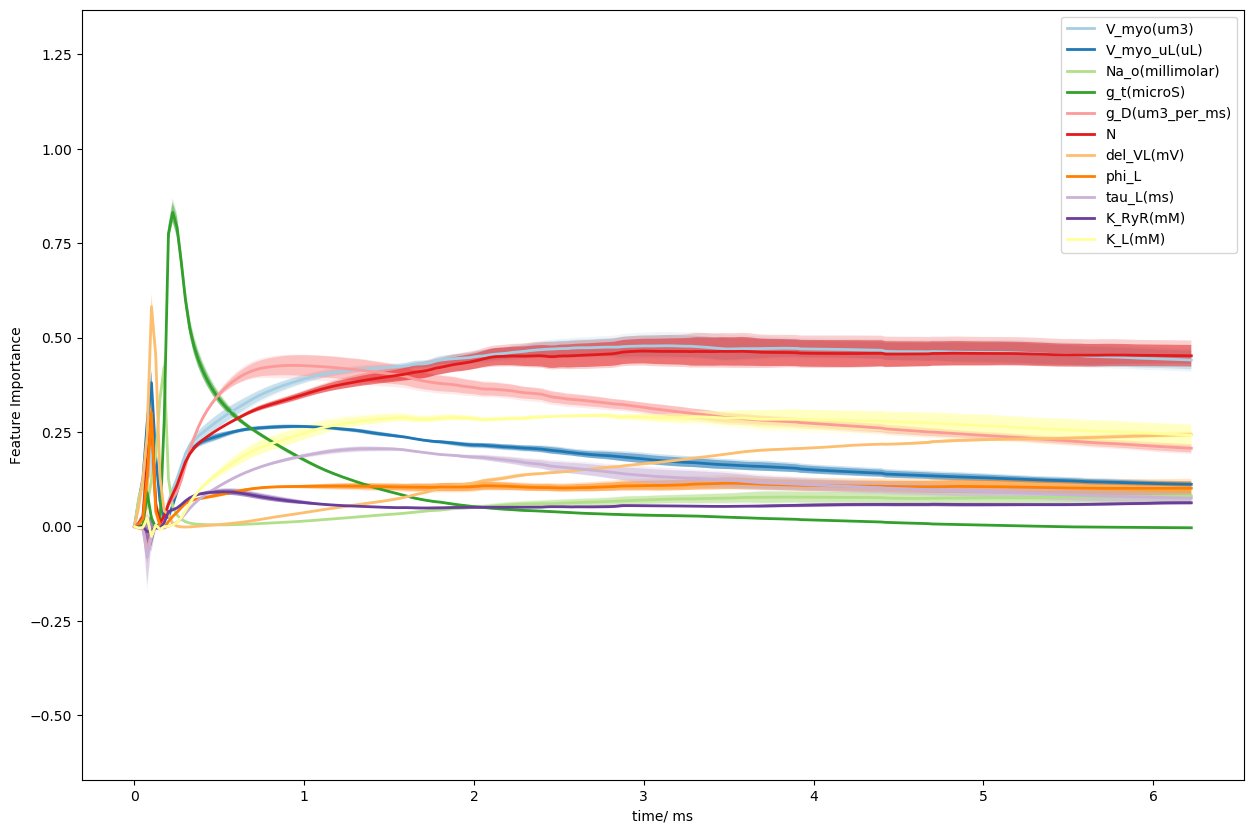

In [141]:
plt.style.use('default')
PFI_plotter_same(PFI_new,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')

In [146]:
x_axis = np.array([i*0.025 for i in range(250)])

In [147]:
stat = Y_test.describe()
stat = stat.T

In [148]:
mu0 = stat['mean'].to_numpy()
std0 = stat['std'].to_numpy()
upper0 = mu0+std0
lower0 = mu0-std0

C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


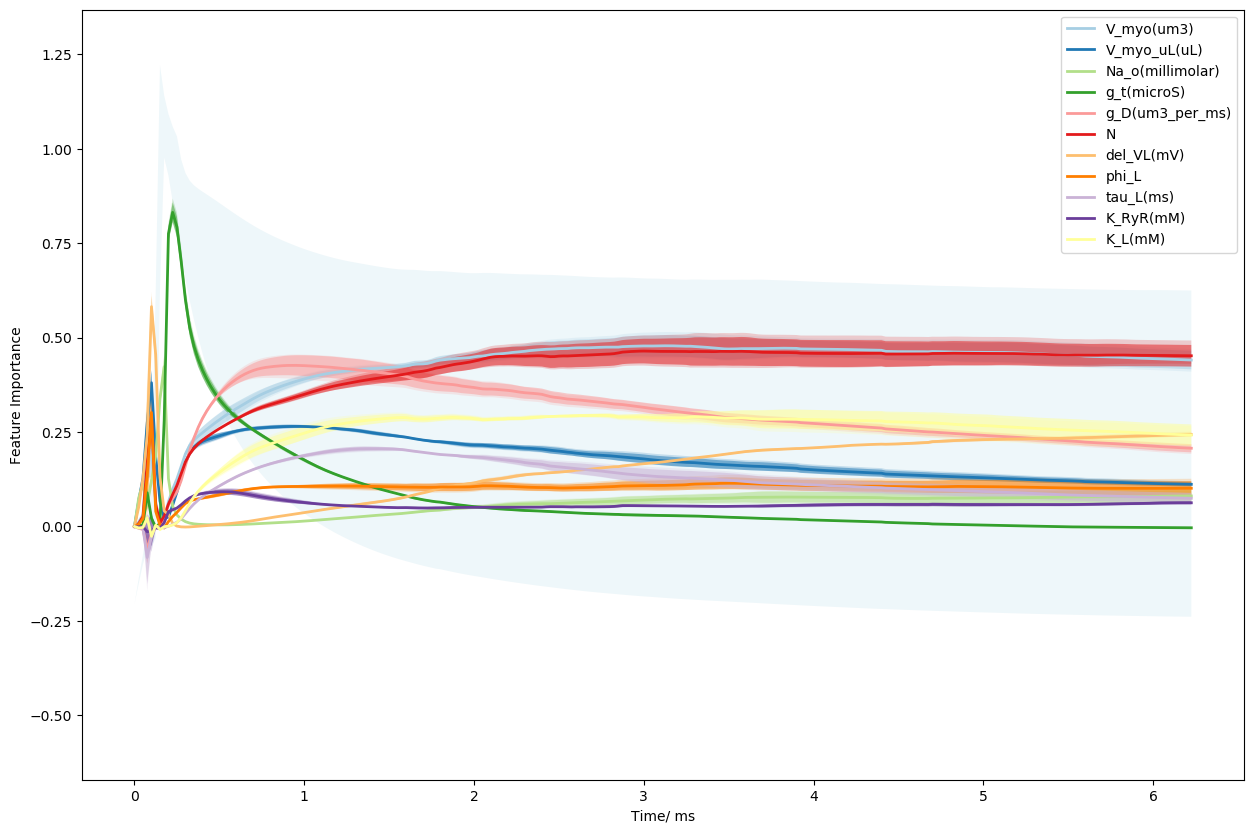

In [155]:
colors = sns.color_palette("Paired", len(names))

fig = plt.figure(figsize=(15,10))

plt.fill_between(x_axis,lower0*0.01+60*0.01,upper0*0.01+60*0.01,facecolor='lightblue',alpha=0.2);


ax = fig.add_subplot(111)
ax.set_prop_cycle('color', colors)

x_array = [f*0.025 for f in range(PFI_new.shape[2])]
#plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
#plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
#plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)


for i in range(PFI_new.shape[1]):

  color = next(ax._get_lines.prop_cycler)['color']


  # Calculate min and max values of PFI for each variable
  sen_max = np.max(PFI_new[:,i,:],axis=0)
  sen_min = np.min(PFI_new[:,i,:],axis=0)
  plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



  # Calculate mean and std values of PFI for each variable
  mu = np.mean(PFI_new[:,i,:],axis=0)
  std = np.std(PFI_new[:,i,:],axis=0)

  upper = mu+std
  lower = mu-std

  plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

  
  plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
  plt.ylim((np.min(PFI_new)-0.5,np.max(PFI_new)+0.5))
  plt.ylabel('Feature Importance')
  plt.xlabel('Time/ ms')
  





  plt.legend()